<a id='banner-image'></a>

<img src='./images/house_banner.png'>

# Predicting Boston Housing Prices

**Shaun Chua**
<br> 8 July 2020

---

## Contents:
[**1. Importing Libraries**](#1)
<br> [**2. Importing Dataset**](#2)
<br> [**3. EDA and Data Cleaning** ](#3)
<br> [**4. Preprocessing**](#4)
<br> [**5. Modelling**](#5)
<br> [**6. Results and Discussion**](#6)
<br> [**7. Conclusion and Recommendations**](#7)
<br> [**8. Credits**](#8)

 <a id='1'></a> 

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# To get notebook runtime
import time

%matplotlib inline

In [2]:
# Starting timer for notebook

t0 = time.time()

<a id='2'></a>

# 2. Importing Dataset

Dataset for this project is taken from the <a href='https://scikit-learn.org/stable/datasets/index.html'>scikit-learn datasets package</a>.

In [3]:
# Loading Boston dataset

boston = datasets.load_boston()

In [4]:
# Checkings keys of dataset

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# Key 'data' refers to Features

boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
# Key 'target' probably refers to Target Variable

boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
# Key 'feature_names' refers to the feature variables

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
# Key 'DESCR' refers to a description of the dataset, along with feature explanation 

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
# Key 'filename' refers to the absolute path of the boston dataset

boston.filename

'C:\\Users\\Shaun\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

## Creating Dataframe for Boston dataset

In [10]:
boston_df = pd.DataFrame(data=boston.data,
                         columns=boston.feature_names,
                         index=None)

In [11]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
# Adding target variable to dataframe

boston_df['MEDV'] = boston['target']

In [13]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<a id='3'></a>

# 3. EDA and Data Cleaning

<a id='data-dictionary'></a>

## Data Dictionary

| Feature        | Type       | Description                                                          |
|:---------------|:-----------|:---------------------------------------------------------------------|
| CRIM           | Continuous | Per capita crime rate by town                                        |
| ZN             | Continuous | Proportion of residential land zoned for lots over 25,000 sq.ft.     |
| INDUS          | Continuous | Proportion of non-retail business acres per town                     |
| CHAS           | Discrete   | Charles River dummy variable (1 if tract bounds river; 0 otherwise)  |
| NOX            | Continuous | Nitric oxides concentration (parts per 10 million)                   |
| RM             | Continuous | Average number of rooms per dwelling                                 |
| AGE            | Continuous | Proportion of owner-occupied units built prior to 1940               |
| DIS            | Continuous | Weighted distances to five Boston employment centres                 |
| RAD            | Ordinal    | Index of accessibility to radial highways                            |
| TAX            | Continuous | Full-value property-tax rate per \$10,000                            |
| PTRATIO        | Continuous | Pupil-teacher ratio by town                                          |
| B              | Continuous | $1000(Bk - 0.63)^2$ where *Bk* is the proportion of blacks by town   |
| LSTAT          | Continuous | \% Lower status of the population                                    |
| MEDV           | Continuous | Median value of owner-occupied homes in $1000's                      |


**Note:** This data dictionary is referenced in the comments for the [Hexbin Plots](#hexbin-plots)

In [14]:
# 506 Observations for 14 Features

boston_df.shape

(506, 14)

In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# Checking for null values

for feature in boston_df.columns:
    print(f'{boston_df[feature].isnull().sum()} null values were found for the {feature} feature.')

0 null values were found for the CRIM feature.
0 null values were found for the ZN feature.
0 null values were found for the INDUS feature.
0 null values were found for the CHAS feature.
0 null values were found for the NOX feature.
0 null values were found for the RM feature.
0 null values were found for the AGE feature.
0 null values were found for the DIS feature.
0 null values were found for the RAD feature.
0 null values were found for the TAX feature.
0 null values were found for the PTRATIO feature.
0 null values were found for the B feature.
0 null values were found for the LSTAT feature.
0 null values were found for the MEDV feature.


### **Comments:**
---

The data looks complete, with no missing values. Further, the data types seem to be correct. 

## Boxplots

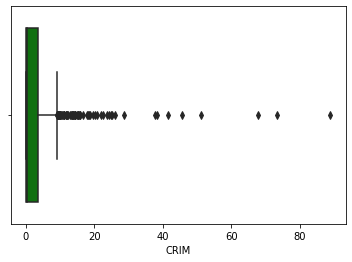

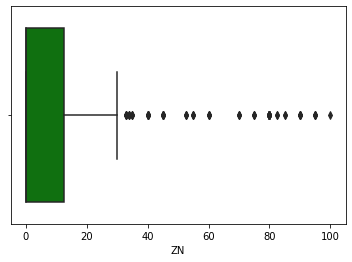

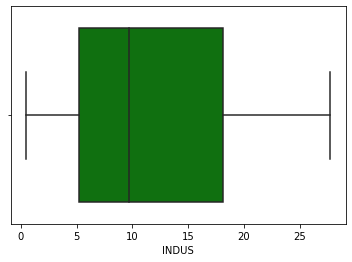

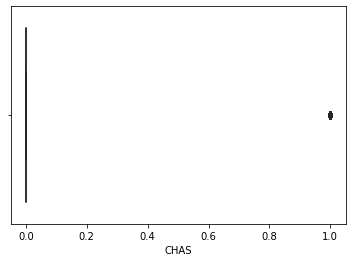

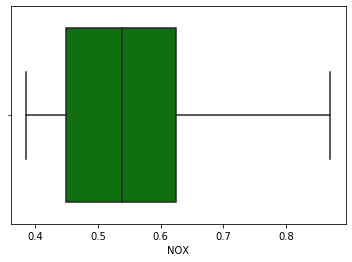

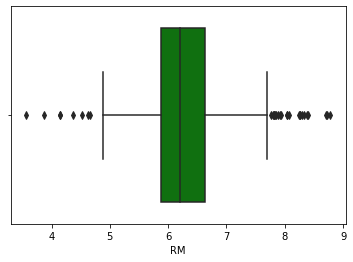

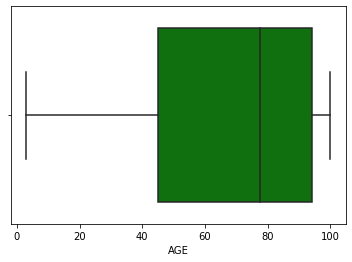

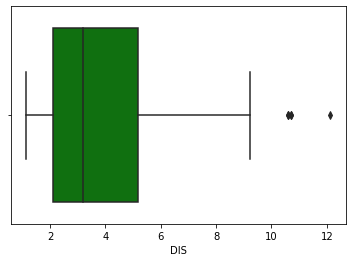

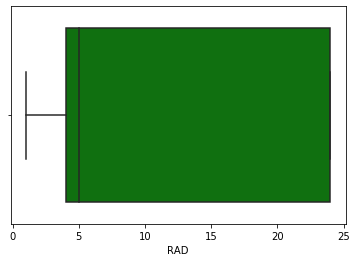

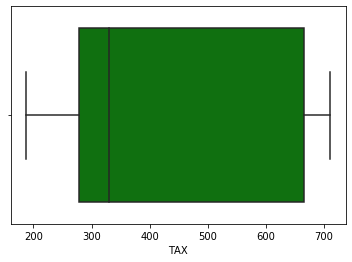

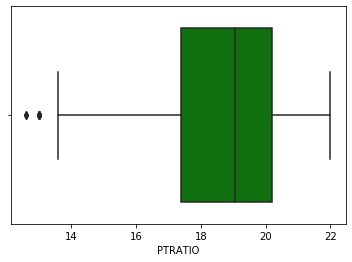

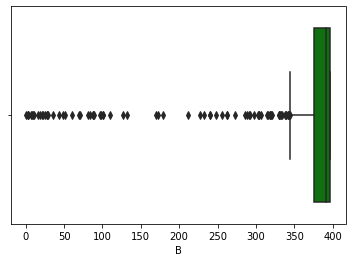

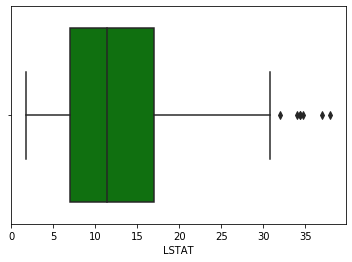

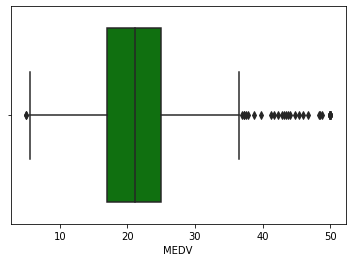

In [18]:
# Checking boxplots to see distribution of each feature

for feature in boston_df.columns:
    plt.show(sns.boxplot(boston_df[feature], color='Green', orient='h'))

### **Comments:**
---

There looks to be quite a few outliers. I will remove the outliers for the features, with the exception of `CHAS` since it is a discrete variable.

But first, I'll visualise the distribution of these features, to decide which outlier treatment to use.

## Distplots

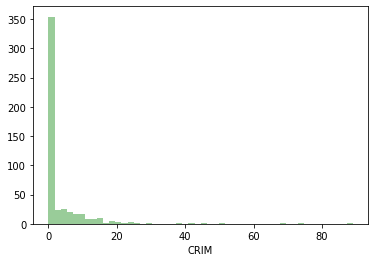

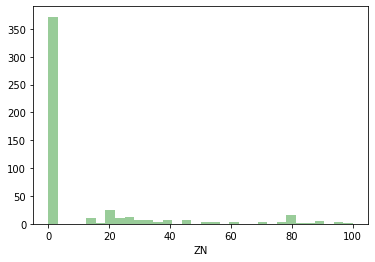

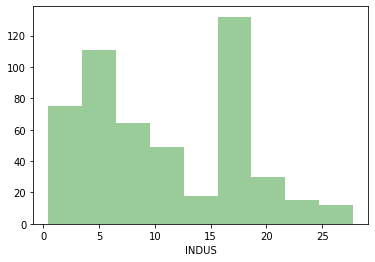

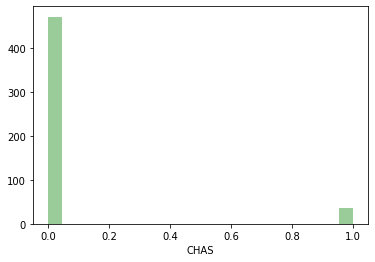

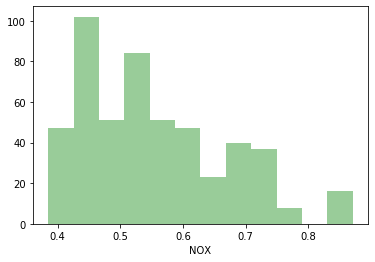

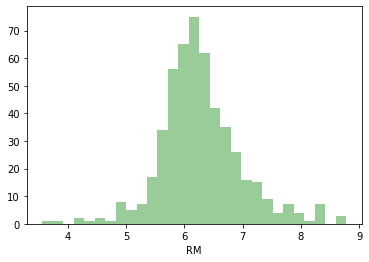

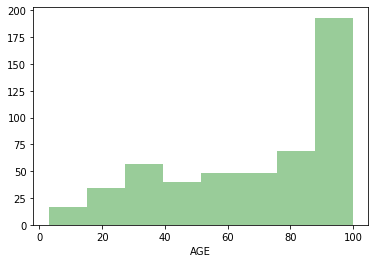

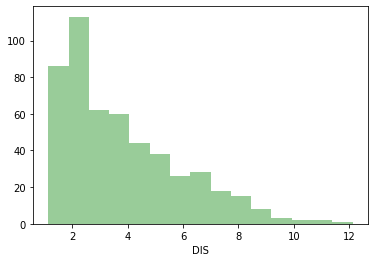

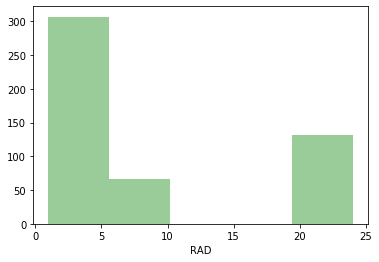

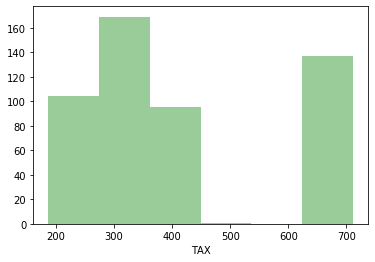

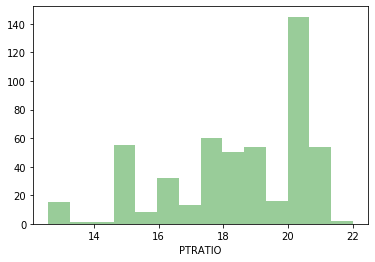

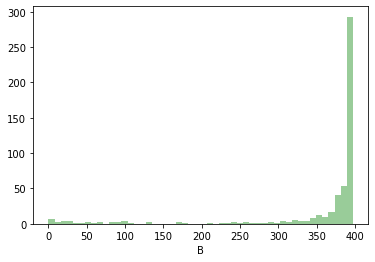

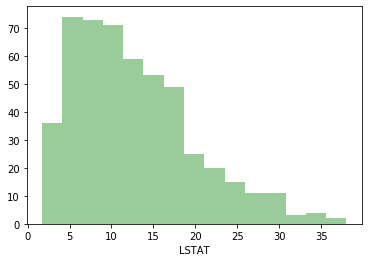

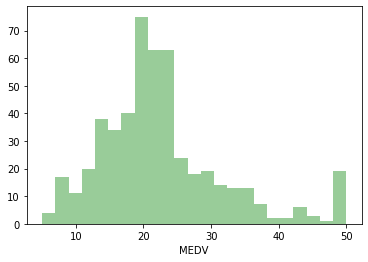

In [19]:
# Visualising distribution of features before deciding how to treat for outliers

for feature in boston_df.columns:
    plt.show(sns.distplot(boston_df[feature], kde=False, color='Green'))

### Comments:
---
It looks as though most features are not normally distributed.

In order to standardise the outlier treatment process, I will not be using **z-scores** to detect outliers, because using them typically <a href='https://stats.stackexchange.com/questions/32357/can-i-use-a-z-score-with-skewed-and-non-normal-data'>requires a normally distributed</a> dataset.

Instead, I will utilise the **Interquartile Range (IQR)** to detect outliers, because it is an alternative method <a href='https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/#urvanov-syntax-highlighter-5f2bdb4451934883727613'>independent of the assumption of normality</a>.

**N.B:** For the purposes of this introductory project, *anomalies* will be treated the same as *outliers*.

## Outlier Treatment using IQR

In [20]:
# Creating new dataframe excluding the 'CHAS' discrete feature

boston_df_uncleaned = boston_df[[x for x in boston_df.columns if x not in ['CHAS']]]
boston_df_uncleaned

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
# Calculating 25th Percentile and 75th Percentile

q1 = boston_df_uncleaned.quantile(0.25)
q3 = boston_df_uncleaned.quantile(0.75)

In [22]:
# Interquartile Range Q3-Q1

iqr = q3 - q1
print(iqr)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64


In [23]:
# Creating outlier mask

outlier_mask = ((boston_df_uncleaned < (q1 - 1.5*iqr)) | (boston_df_uncleaned>(q3 + 1.5*iqr)))
print(outlier_mask)

      CRIM     ZN  INDUS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO  \
0    False  False  False  False  False  False  False  False  False    False   
1    False  False  False  False  False  False  False  False  False    False   
2    False  False  False  False  False  False  False  False  False    False   
3    False  False  False  False  False  False  False  False  False    False   
4    False  False  False  False  False  False  False  False  False    False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...      ...   
501  False  False  False  False  False  False  False  False  False    False   
502  False  False  False  False  False  False  False  False  False    False   
503  False  False  False  False  False  False  False  False  False    False   
504  False  False  False  False  False  False  False  False  False    False   
505  False  False  False  False  False  False  False  False  False    False   

         B  LSTAT   MEDV  
0    False  False  False

In [24]:
# Returning Dataframe without outliers

boston_df_cleaned = boston_df_uncleaned[~outlier_mask.any(axis=1)]

In [25]:
# Adding 'CHAS' feature back

boston_df_cleaned['CHAS'] = boston_df['CHAS']

C:\Users\Shaun\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Resetting Index

boston_df_cleaned = boston_df_cleaned.reset_index(drop=True)

In [27]:
boston_df_cleaned

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0.0
284,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0.0
285,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0.0
286,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0.0


### Comments:
---

After outlier treatment utilising IQR, I am left with 288 observations, and will continue with EDA.

## Heatmap

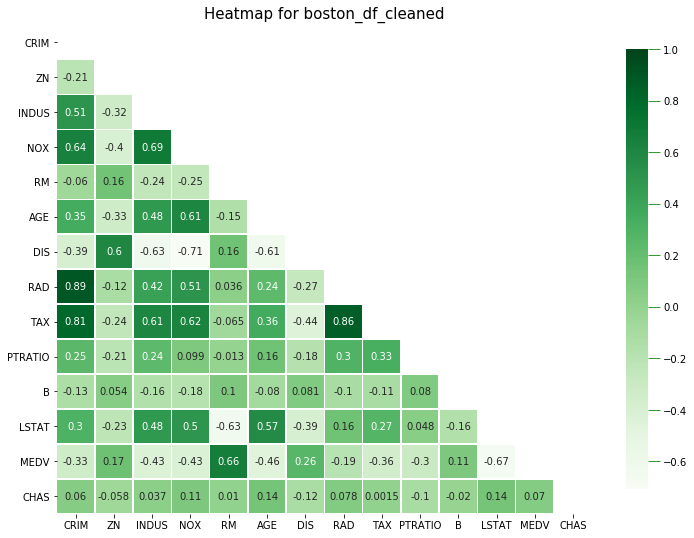

In [28]:
# Creating figure
fig, ax = plt.subplots(figsize=(12,9))

# Creating mask to show lower triangle only
mask = np.zeros_like(boston_df_cleaned.corr())
mask[np.triu_indices_from(mask)] = True

# Creating heatmap
ax = sns.heatmap(boston_df_cleaned.corr(), cmap="Greens", annot=True, mask=mask, lw=0.5, cbar_kws={'shrink':0.9})
ax.set_title('Heatmap for boston_df_cleaned', fontsize=15)

# Customising color bar using matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(axis='y', size=12, color='green', labelcolor='black', direction='out')

## Absolute Pairwise Correlations

In [29]:
# Getting absolute pairwise correlations  

medv_corr = pd.DataFrame([np.abs(boston_df_cleaned.corr()['MEDV']).sort_values(ascending=False), boston_df_cleaned.corr()['MEDV']], index=['Abs Corr', 'Corr'])
medv_corr.T

,Abs Corr,Corr
MEDV,1.000000,1.000000
LSTAT,0.670293,-0.670293
RM,0.660472,0.660472
AGE,0.455836,-0.455836
INDUS,0.428978,-0.428978
NOX,0.427385,-0.427385
TAX,0.359987,-0.359987
CRIM,0.328228,-0.328228
PTRATIO,0.297836,-0.297836
DIS,0.261787,0.261787


### Comments:
---

From the **Heatmap** and the pairwise correlation, it is evident that the vast majority of features **do not** exhibit a strong linear correlation with the target `MEDV`.

Thus, I will only select features with a pearson's correlation coefficient **greater** than 0.4. 

## Feature Selection

In [30]:
# Selecting features with > 0.4 correlation coefficient

selected_features = []

for feature in medv_corr.columns:
    if medv_corr[feature][0] > 0.4:
        selected_features.append(feature)

In [31]:
# List of selected_features

selected_features

['MEDV', 'LSTAT', 'RM', 'AGE', 'INDUS', 'NOX']

In [32]:
# Creating Dataframe with selected features

boston_df_final = boston_df_cleaned[selected_features]
boston_df_final

,MEDV,LSTAT,RM,AGE,INDUS,NOX
0,24.0,4.98,6.575,65.2,2.31,0.538
1,21.6,9.14,6.421,78.9,7.07,0.469
2,34.7,4.03,7.185,61.1,7.07,0.469
3,33.4,2.94,6.998,45.8,2.18,0.458
4,36.2,5.33,7.147,54.2,2.18,0.458
...,...,...,...,...,...,...
283,22.4,9.67,6.593,69.1,11.93,0.573
284,20.6,9.08,6.120,76.7,11.93,0.573
285,23.9,5.64,6.976,91.0,11.93,0.573
286,22.0,6.48,6.794,89.3,11.93,0.573


In [33]:
# Sorting feature names alphabetically

boston_df_final = boston_df_final.reindex(sorted(boston_df_final.columns), axis=1)

In [34]:
# Shifting 'MEDV' to end of dataframe

boston_df_final = pd.concat([boston_df_final[[x for x in boston_df_final.columns if x not in ['MEDV']]], boston_df_final['MEDV']], 
                               axis=1)

In [35]:
boston_df_final

,AGE,INDUS,LSTAT,NOX,RM,MEDV
0,65.2,2.31,4.98,0.538,6.575,24.0
1,78.9,7.07,9.14,0.469,6.421,21.6
2,61.1,7.07,4.03,0.469,7.185,34.7
3,45.8,2.18,2.94,0.458,6.998,33.4
4,54.2,2.18,5.33,0.458,7.147,36.2
...,...,...,...,...,...,...
283,69.1,11.93,9.67,0.573,6.593,22.4
284,76.7,11.93,9.08,0.573,6.120,20.6
285,91.0,11.93,5.64,0.573,6.976,23.9
286,89.3,11.93,6.48,0.573,6.794,22.0


## Pairplots

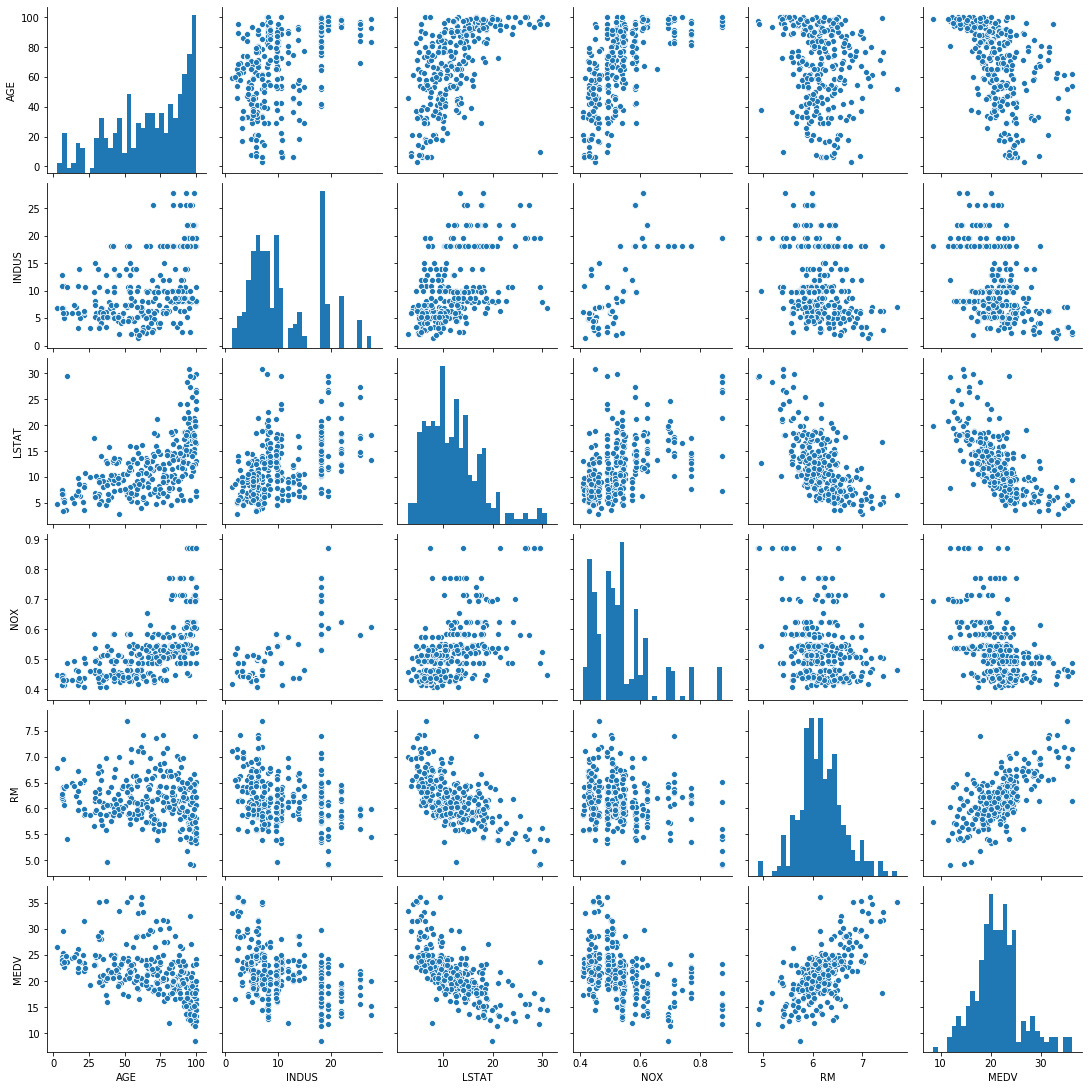

In [36]:
sns.pairplot(boston_df_final, palette='Green',
             diag_kws={'bins':30})

## Regplots

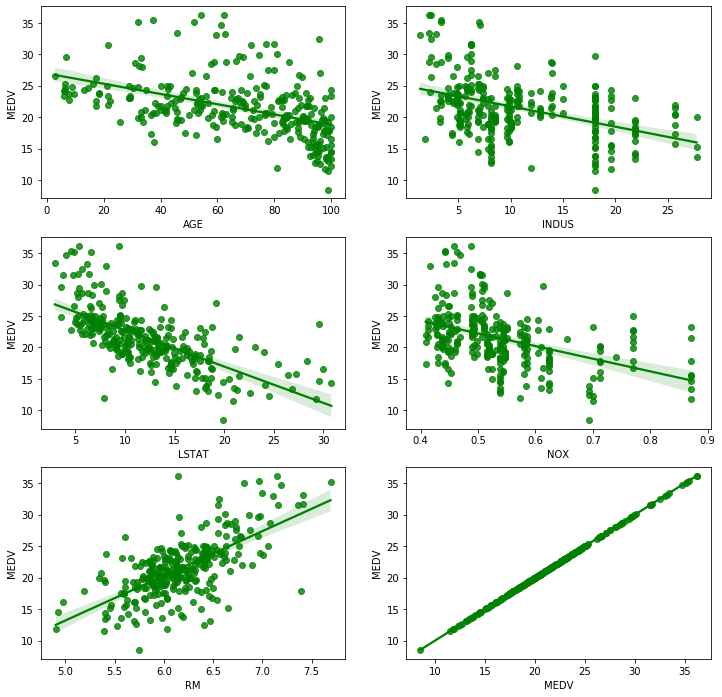

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

sns.regplot(x='AGE', y='MEDV', data=boston_df_final, color='green', ax=ax[0,0])
sns.regplot(x='INDUS', y='MEDV', data=boston_df_final, color='green', ax=ax[0,1])
sns.regplot(x='LSTAT', y='MEDV', data=boston_df_final, color='green', ax=ax[1,0])
sns.regplot(x='NOX', y='MEDV', data=boston_df_final, color='green', ax=ax[1,1])
sns.regplot(x='RM', y='MEDV', data=boston_df_final, color='green', ax=ax[2,0])
sns.regplot(x='MEDV', y='MEDV', data=boston_df_final, color='green', ax=ax[2,1])

## Jointplot -  `AGE` vs. `MEDV`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


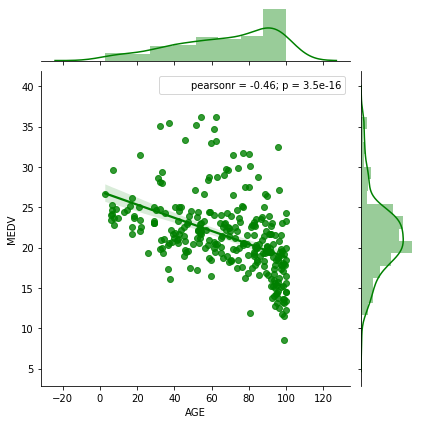

In [38]:
sns.jointplot(x='AGE', 
              y='MEDV', 
              data=boston_df_final, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot - `INDUS` vs `MEDV`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


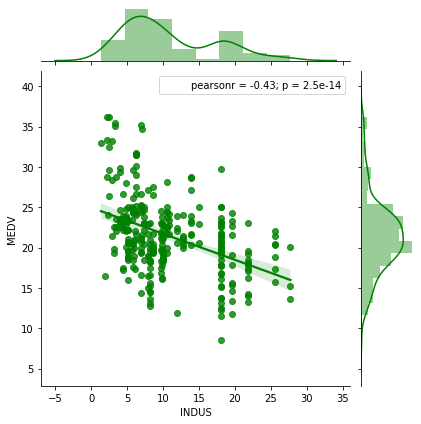

In [39]:
sns.jointplot(x='INDUS', 
              y='MEDV', 
              data=boston_df_final, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot -  `LSTAT` vs. `MEDV`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


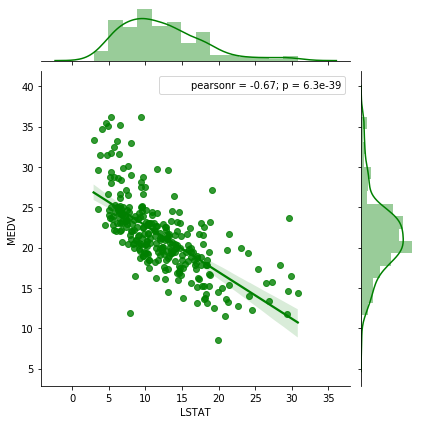

In [40]:
sns.jointplot(x='LSTAT', 
              y='MEDV', 
              data=boston_df_final, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot -  `NOX` vs. `MEDV`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


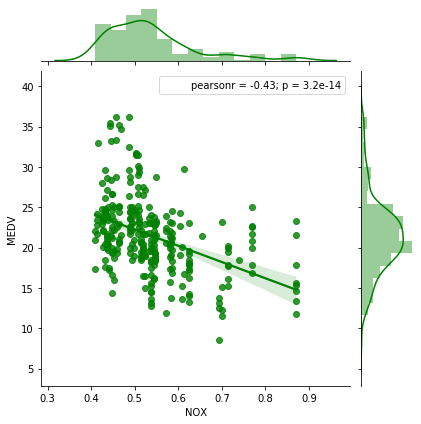

In [41]:
sns.jointplot(x='NOX', 
              y='MEDV', 
              data=boston_df_final, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

## Jointplot - `RM` vs `MEDV`

C:\Users\Shaun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


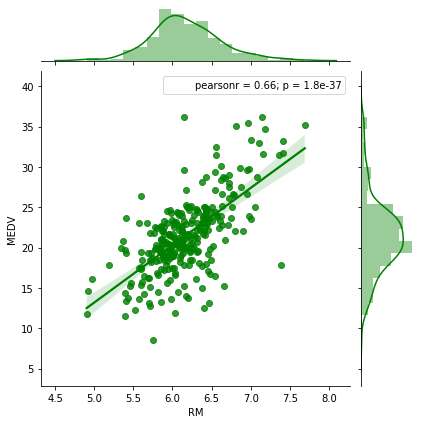

In [42]:
sns.jointplot(x='RM', 
              y='MEDV', 
              data=boston_df_final, 
              kind='reg', 
              color='green', 
              space=0.2).annotate(stats.pearsonr)

### **Comments:**
---

From the **pairplots** and **jointplots**, it would seem that:

`LSTAT` has a **strong negative** correlation with `MEDV`. 

`RM` has a **strong positive** correlation with `MEDV`.

I'll now utilise a **Hexbin Plot** to try and gain more insight. 

## Hexbin Plot - `AGE` vs `MEDV`

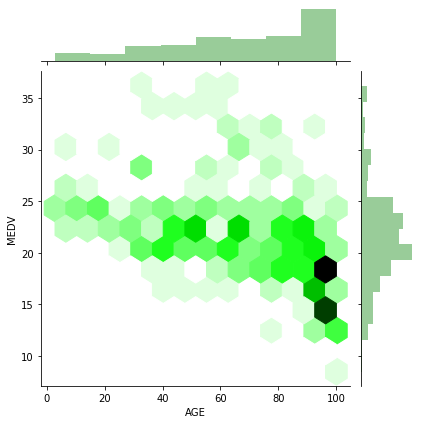

In [43]:
sns.jointplot(x='AGE',
              y='MEDV', 
              data=boston_df_final, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `INDUS` vs `MEDV`

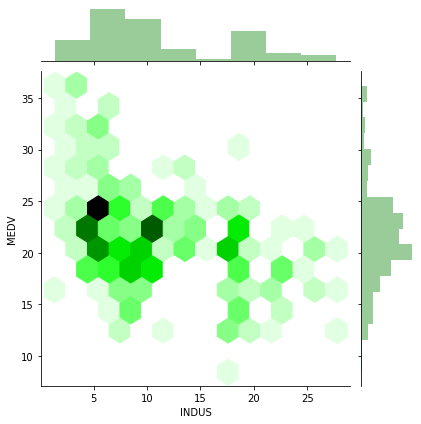

In [44]:
sns.jointplot(x='INDUS',
              y='MEDV', 
              data=boston_df_final, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `LSTAT` vs `MEDV`

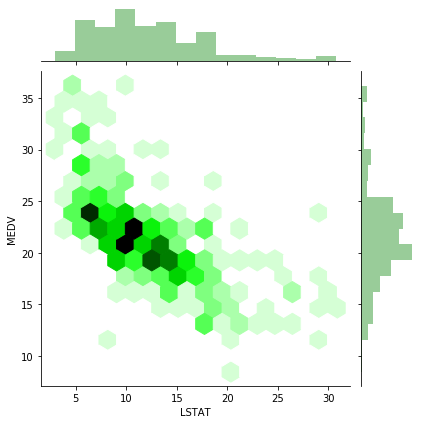

In [45]:
sns.jointplot(x='LSTAT',
              y='MEDV', 
              data=boston_df_final, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `NOX` vs `MEDV`

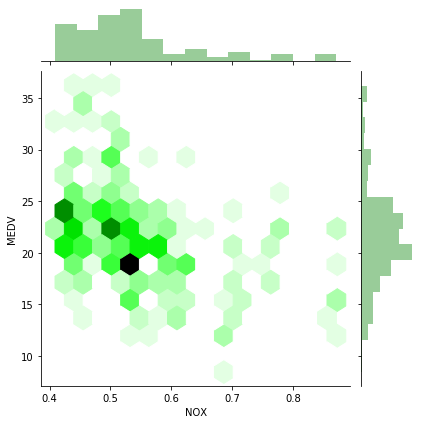

In [46]:
sns.jointplot(x='NOX',
              y='MEDV', 
              data=boston_df_final, 
              color='Green', 
              kind='hex')

## Hexbin Plot - `RM` vs `MEDV`

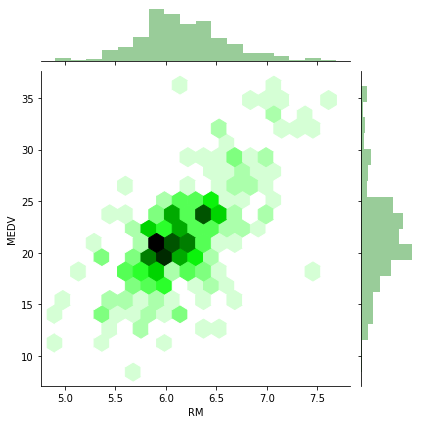

In [47]:
sns.jointplot(x='RM',
              y='MEDV', 
              data=boston_df_final, 
              color='Green', 
              kind='hex')

<a id='hexbin-plots'></a>


### Comments:

---

From the **Hexbin Plots**, here are my findings:

**AGE**
<br> There are many houses which are owner-occupied (>90%), which also tend to be of low value (<$20 000). It would appear that `MEDV` tends to fall as `AGE` increase.

**INDUS**
<br> The proportion of non-retail business per acre tends to be low (5-10 acres), valued at about <span>$</span>20 000 - \$25 000. It would appear that `MEDV` tends to fall `INDUS` increases. 

**LSTAT**
<br> Most houses tend to comprise a low proportion of the low status population (5% - 15%). It would appear that `MEDV` tends to decrease as `LSTAT` increases. 

**NOX**
<br> The most common nitric oxide concentrations fall between 0.04 ppm to 0.05 ppm, with house prices falling between the <span>$</span> 19 000 - \$25 000 range. Generally, `MEDV` appears to decrease as `NOX` increases.

**RM**
The most common number of rooms per house seems to be 6, fetching a price of about <span>$</span>21 000. Generally, it appears that as `RM` increases, `MEDV` increases.

The Data Dictionary is [here](#data-dictionary) for a recap on what each feature means.

## Exporting Cleaned Data to CSV

In [48]:
boston_df_final.to_csv('./datasets/boston_df_final.csv', index=False)

<a id='4'></a>

# 4. Preprocessing

## Setting Features and Target

In [49]:
features = [feature for feature in boston_df_final if feature not in 'MEDV']
print(features)

['AGE', 'INDUS', 'LSTAT', 'NOX', 'RM']


In [50]:
target = ['MEDV']
print(target)

['MEDV']


## Train-Test-Split

In [51]:
X = boston_df_final[features]
y = boston_df_final[target]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=708)

## Scaling

In [53]:
ss = StandardScaler()

In [54]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

<a id='5'></a>

# 5. Modelling

## Model Instantiation

In [55]:
lr = LinearRegression()

## Training Data

In [56]:
# Fitting Training Data

lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Train R2 Score

train_r2 = lr.score(X=X_train_sc, y=y_train)
train_r2

0.5774711309477574

In [58]:
explained_variance_score(y_train, lr.predict(X_train_sc))

0.5774711309477574

In [59]:
# Train RMSE Score

train_rmse = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train_sc), squared=False)
train_rmse

3.106408456305455

## Test Data

In [60]:
# Test R2 Score

test_r2 = lr.score(X_test_sc, y_test)
test_r2

0.6484293539301977

In [61]:
# Test explained_variance_ratio 

explained_variance_score(y_test, lr.predict(X_test_sc))

0.6521787228723195

In [62]:
# Test RMSE Score

test_rmse = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test_sc), squared=False)
test_rmse

2.614223686955074

<a id='6'></a>

# 6. Results and Discussion

In [63]:
# Creating dataframe to summarise train and test scores

lr_metrics = pd.DataFrame(data=[train_r2, test_r2, train_rmse, test_rmse], 
                          index=['Train R\u00b2', 'Test R\u00b2', 'Train RMSE', 'Test RMSE'],
                          columns=['Linear Regression'])

In [64]:
lr_metrics

,Linear Regression
Train R²,0.577471
Test R²,0.648429
Train RMSE,3.106408
Test RMSE,2.614224


### Comments:
---
#### **Training Data**
The training $R^2$ score indicates that about 57.75% of the variation in `MEDV` can be explained by the features included in the Linear Regression model.

This means that 57.75% of `MEDV` is predictable from the features.

The training RMSE indicates that using the features to predict `MEDV` may result in approxmiately a $3106 deviation from the actual value, which is acceptable in this context.

#### **Test Data**
There is a slight variation between the $R^2$ score, and the Explained Variance Score for the test set.
This <a href='https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-varian'>link</a> explains the reason for the difference in $R^2$ Score and the Explained Variance Score.

Essentially it boils down to mean residue, but for the purposes of this project, they will be treated as equivalent.

Worth noting is that the test scores are better than the training scores, indicating that the model performed better on the test set. This could be due to substantial differences in statistical properties of the testing set.

**Cross Validation** may help to alleviate this, but is beyond the scope of this project.

On the test set, 64.84% of `MEDV` is predictable from the features, with predicted values of `MEDV` deviating approximately $2614 from the actual value of `MEDV`.

#### Model is Performing Well
Looking at the scores, both the training scores and the test scores are acceptable, with no sign of overfitting. 

We can thus look at the model-generated coefficients of each feature to see which feature is the most influential in predicting `MEDV`.

<a id='coef-table'></a>

## Coefficients 

In [65]:
# Creating a DataFrame to store coefficients

lr_coefs = pd.DataFrame(data=lr.coef_.ravel(), index=X_train.columns, columns=['Coefficient'])
lr_coefs.sort_values(by='Coefficient', inplace=True, ascending=False)

In [66]:
lr_coefs

,Coefficient
RM,2.127773
NOX,-0.023748
INDUS,-0.631253
LSTAT,-0.919645
AGE,-1.089273


### Comments:

---
The table shows the coefficients of the features.

`RM` emerged as the most influential feature, with the highest coefficient at approxmiately 2.128.

A one unit increase in `RM` is associated with about a $2128 increase in `MEDV`

This is not surprising, since a larger number of rooms tend to imply a larger area, which typically results in higher housing prices.

**Note:** This table is referenced in the [Conclusions and Recommendations](#7) section.

## MLR Asssumption - Normally Distributed Residuals

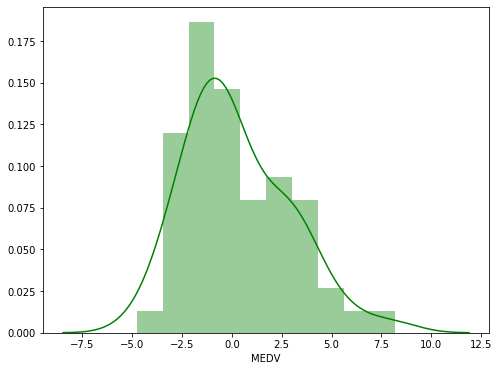

In [67]:
# Checking for Normality of Errors

fig = plt.figure(figsize=(8,6))

sns.distplot(y_test-lr.predict(X_test_sc), axlabel='MEDV', bins=10, color='green')

## Comments:

---

Based on the histogram, the residuals look approximately normally distributed, so our data was alright.

## MLR Assumption - Homoscedasticity 

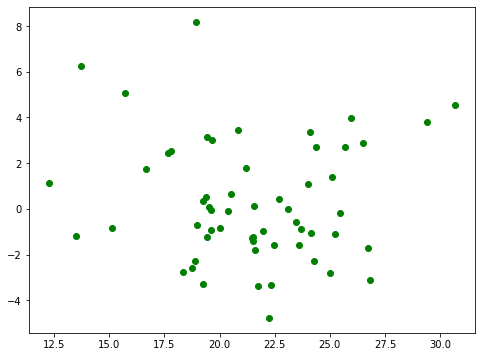

In [68]:
# Checking for Homoscedasticity

fig = plt.figure(figsize=(8,6))

plt.scatter(y=y_test-lr.predict(X_test_sc), x=lr.predict(X_test_sc), color='green')

## Comments:

---

Based on the scatterplot, there does not appear to be any funnel-shape, suggesting that the regression does not predict certain values of X more accurately than others.

Residuals seem to range between 4 and -4, with a few exceptions ranging beyond 4.

Overall, it appears that the assumption of Homoscedasticity has been met.

<a id='7'></a>

# 7. Conclusion and Recommendations

There was no business question associated with this project, as it was a project meant to investigate how housing prices vary with a set number of features. Nonetheless, the information may serve as a guideline individuals looking to invest in property.

## Recommendation: Focus on Number of Rooms
Based on the [coefficients table](#coef-table) shown above, the coefficient of the `RM` was about 2.13, significantly higher than the all the other coefficients.

Therefore, individuals can consider the number of rooms when looking to invest in property since it housing prices appear to increase with number of rooms.  

<a id='8'></a>

## 8. Credits
[Banner Image](#banner-image): <a href='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png'>Google Cloud</a>

In [69]:
# Getting the runtime of notebook

print(f"Run complete, total time taken \u2248 {time.time()-t0:.2f}s")

Run complete, total time taken ≈ 16.03s
